# Task 1: Introduction

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

# Task 2: Dataset

Real estate agent table:

|Area|Distance|Price|
|---|---|---|
|70|3|21200|
|50|1|22010|
|120|9|24305|
|100|2|31500|

You can write the relationship with a 2-variable linear equation:

$
\begin{equation}
y = b + w_1.x_1 + w_2.x_2
\end{equation}
$

In a vector form:

$
\begin{equation}
y = b + (w_1 w_2).\binom{x_1}{x_2}
\end{equation}
$

Where
$
\begin{equation}
W = (w_1 w_2)
\end{equation}
$
and
$
\begin{equation}
X = \binom{x_1}{x_2}
\end{equation}
$

In [12]:
def generate_examples(num=1000):
  W = [1.0, -3.0]
  b = 1.0

  W = np.reshape(W, (2, 1))

  X = np.random.randn(num, 2)

  y = b + np.dot(X, W) + np.random.randn()

  y = np.reshape(y, (num, 1))

  return X, y

In [13]:
X, y = generate_examples()

In [14]:
print(X.shape, y.shape)

(1000, 2) (1000, 1)


In [15]:
print(X[0], y[0])

[0.47022547 0.72229359] [-1.19699368]


# Task 3: Initialize Parameters

The loss over **m** examples:

$
\begin{equation}
J = \frac{1}{2m} \sum_{i=1}^{m} (y - \hat{y})^2
\end{equation}
$

The objective of the gradient descent algorithm is to minimize this loss value.

Gradient Descent Objective is to
$
\begin{equation}
min(J)
\end{equation}
$

In [16]:
class Model:
  def __init__(self, num_features):
    self.num_features = num_features
    self.W = np.random.randn(num_features, 1)
    self.b = np.random.randn()

In [17]:
model = Model(2)
print(model.W)
print(model.b)

[[-1.27284081]
 [ 0.62348981]]
-0.5609184247446483


# Task 4: Forward Pass

In [19]:
class Model(Model):
  def forward_pass(self, X):
    y_hat = self.b + np.dot(X, self.W)
    return y_hat

In [21]:
y_hat = Model(2).forward_pass(X)
print(y_hat.shape, y_hat[0])

(1000, 1) [1.1876872]


# Task 5: Compute Loss

The loss over **m** examples:

$
\begin{equation}
J = \frac{1}{2m} \sum_{i=1}^{m} (y - \hat{y})^2
\end{equation}
$

In [22]:
class Model(Model):
  def compute_loss(self, y_hat, y_true):
    return np.sum(np.square(y_hat - y_true))/(2*y_hat.shape[0])


In [23]:
model = Model(2)
y_hat = model.forward_pass(X)
loss = model.compute_loss(y_hat, y)

In [24]:
loss

3.284246370246068

# Task 6: Backward Pass

The gradient of loss with respect to bias can be calculated with:

$
\begin{equation}
\frac{dJ}{db} = \frac{1}{m} \sum_{i=1}^{m} (\hat{y^{(i)}} - y^{(i)})
\end{equation}
$

$
\begin{equation}
\frac{dJ}{dW_j} = \frac{1}{m} \sum_{i=1}^{m} (\hat{y^{(i)}} - y^{(i)}).x_j^{(i)}
\end{equation}
$

In [25]:
class Model(Model):
  def backward_pass(self, X, y_true, y_hat):
    m = y_true.shape[0]
    db = (1/m)*np.sum(y_hat - y_true)
    dw = (1/m)*np.sum(np.dot(np.transpose(y_hat - y_true), X), axis=0)
    return dw, db

In [26]:
model = Model(2)

X, y = generate_examples()
y_hat = model.forward_pass(X)

dw, db = model.backward_pass(X, y, y_hat)

In [27]:
print(dw, db)

[-1.2075851   2.46991358] -2.217546121246994


# Task 7: Update Parameters

In [28]:
class Model(Model):
  def update_params(self, dw, db, lr):
    self.W = self.W - lr * np.reshape(dw, (self.num_features, 1))
    self.b = self.b - db

# Task 8: Training Loop

In [29]:
class Model(Model):
  def train(self, x_train, y_train, iterations, lr):
    losses = []
    for i in range(0, iterations):
      y_hat = self.forward_pass(x_train)
      loss = self.compute_loss(y_hat, y_train)
      dw, db = self.backward_pass(x_train, y_train, y_hat)
      self.update_params(dw, db, lr)
      losses.append(loss)
      if i%int(iterations/10):
        print('Iter: {}, Loss: {:.4f}'.format(i, loss))
    return losses


In [30]:
model = Model(2)


In [31]:
x_train, y_train = generate_examples()

In [32]:
losses = model.train(x_train, y_train, 1000, 3e-3)

Iter: 1, Loss: 1.1687
Iter: 2, Loss: 1.1614
Iter: 3, Loss: 1.1542
Iter: 4, Loss: 1.1469
Iter: 5, Loss: 1.1398
Iter: 6, Loss: 1.1327
Iter: 7, Loss: 1.1256
Iter: 8, Loss: 1.1186
Iter: 9, Loss: 1.1116
Iter: 10, Loss: 1.1046
Iter: 11, Loss: 1.0977
Iter: 12, Loss: 1.0909
Iter: 13, Loss: 1.0841
Iter: 14, Loss: 1.0773
Iter: 15, Loss: 1.0706
Iter: 16, Loss: 1.0639
Iter: 17, Loss: 1.0573
Iter: 18, Loss: 1.0507
Iter: 19, Loss: 1.0441
Iter: 20, Loss: 1.0376
Iter: 21, Loss: 1.0311
Iter: 22, Loss: 1.0247
Iter: 23, Loss: 1.0183
Iter: 24, Loss: 1.0119
Iter: 25, Loss: 1.0056
Iter: 26, Loss: 0.9993
Iter: 27, Loss: 0.9931
Iter: 28, Loss: 0.9869
Iter: 29, Loss: 0.9807
Iter: 30, Loss: 0.9746
Iter: 31, Loss: 0.9685
Iter: 32, Loss: 0.9625
Iter: 33, Loss: 0.9564
Iter: 34, Loss: 0.9505
Iter: 35, Loss: 0.9445
Iter: 36, Loss: 0.9386
Iter: 37, Loss: 0.9328
Iter: 38, Loss: 0.9270
Iter: 39, Loss: 0.9212
Iter: 40, Loss: 0.9154
Iter: 41, Loss: 0.9097
Iter: 42, Loss: 0.9040
Iter: 43, Loss: 0.8984
Iter: 44, Loss: 0.89

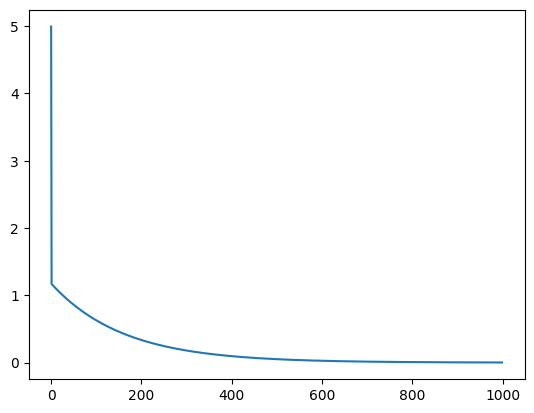

In [33]:
plt.plot(losses)

# Task 9: Predictions

In [34]:
model_untrained = Model(2)

x_test, y_test = generate_examples(500)
print(x_test.shape, y_test.shape)

(500, 2) (500, 1)


In [36]:
preds_untrained = model_untrained.forward_pass(x_test)
preds_trained = model.forward_pass(x_test)

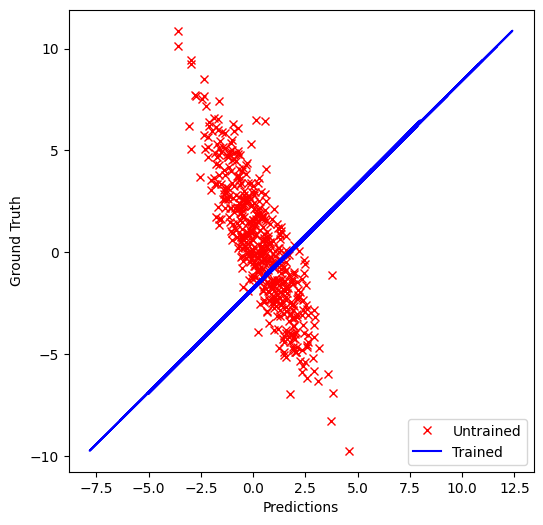

In [37]:
plt.figure(figsize=(6, 6))
plt.plot(preds_untrained, y_test, 'rx', label='Untrained')
plt.plot(preds_trained, y_test, 'b', label='Trained')
plt.legend()
plt.xlabel('Predictions')
plt.ylabel('Ground Truth')
plt.show()